In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, rc, rcParams
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
import pandas as pd
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
sys_type = ['light',  'GW150914_like']

In [4]:
dist = ['400', '1000']
titles = [r'$d_{\rm L} = 400 \, \rm Mpc$', r'$d_{\rm L} = 1 \, \rm Gpc$']

In [7]:
from cycler import cycler
# Dark theme settings
plt.style.use('dark_theme.mplstyle')
# Set color cycle in code
colors = ['#61AFEF', '#E5C07B', '#98C379', '#C678DD', '#E06C75']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [8]:
labs = [r'$15\,{\rm Hz}$', r'$20\,{\rm Hz}$', r'$25\,{\rm Hz}$', r'$30\,{\rm Hz}$', r'$35\,{\rm Hz}$', r'$40\,{\rm Hz}$']

In [9]:
freqs = [r'$15$', r'$20$', r'$25$', r'$30$', r'$35$', r'$40$']

In [10]:
width = [0.39, 0.39, 0.35, 0.4, 0.4, 0.4] 

In [12]:
import matplotlib.gridspec as gridspec
from gw_eccentricity.plot_settings import use_fancy_plotsettings, figHeightsDict, figWidthsTwoColDict

In [55]:
cols_matp = [colors[0], colors[1]]

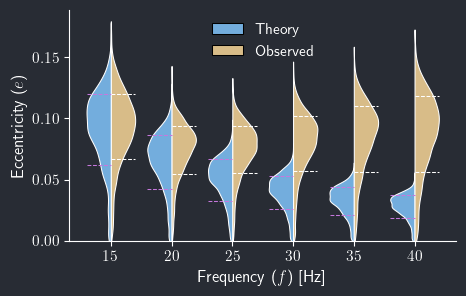

In [56]:
fig, ax = plt.subplots(figsize=(5,3), sharex=True)

data_dir = "../../../EECT/Data/"

for ii in range(2):
    for jj in range(2):
        if not (ii == 0 and jj == 1):
            continue

        posterior_th = np.load(f'{data_dir}/ecc_mclz_300_0p1_{sys_type[ii]}_mass_dl_{dist[jj]}_latest.npz', allow_pickle=True)['theory_ecc_post'].tolist()
        posterior_obs = np.load(f'{data_dir}/ecc_mclz_300_0p1_{sys_type[ii]}_mass_dl_{dist[jj]}_latest.npz', allow_pickle=True)['obs_ecc_post'].tolist()
        for kk in range(6):
            s1 = pd.Series(posterior_th[kk], 
                           name='Value'
                          ).to_frame()
            s2 = pd.Series(posterior_obs[kk], 
                           name='Value'
                          ).to_frame()
            s1['Group'] = 'Theory'
            s2['Group'] = 'Observed'
            df_long = pd.concat([s1, s2], ignore_index=True)
            df_long['x'] = freqs[kk]
            sns.violinplot(data = df_long, ax = ax, x= 'x', y='Value', hue = 'Group', palette = cols_matp, linecolor ="white", density_norm="width",
                           inner=None, linewidth = 0.75, split = True, alpha=1, saturation=0.75, legend = False)
    
        for kk in range(6):
            quantiles = [
                np.quantile(posterior_th[kk], 0.16),
                np.quantile(posterior_th[kk], 0.84)
            ]

            for q in quantiles:
                violin_width = 0.4
                ax.hlines(q, kk - violin_width, kk, color=colors[3], linestyle='--', linewidth=0.75)
            quantiles = [
                np.quantile(posterior_obs[kk], 0.16),
                np.quantile(posterior_obs[kk], 0.84)
            ]

            for q in quantiles:
                violin_width = 0.4
                ax.hlines(q, kk, kk + violin_width, color="white", linestyle='--', linewidth=0.75)

        ax.set_xticks(ticks=range(6), labels=freqs)
        ax.set_ylim(0,)


violin_bodies = [c for c in plt.gca().collections if isinstance(c, matplotlib.collections.PolyCollection)]

custom_legend = [
    Patch(facecolor=violin_bodies[0].get_facecolor()[0] , edgecolor='black', label=r'Theory', linewidth = 0.75),
    Patch(facecolor=violin_bodies[1].get_facecolor()[0] , edgecolor='black', label=r'Observed', linewidth = 0.75),
]

ax.legend(handles=custom_legend, loc='upper center', 
          #bbox_to_anchor=(1, 1)
         )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Frequency ($f$) [Hz]")
ax.set_ylabel("Eccentricity ($e$)")
# ax.set_title("$d_L$ = 1 Gpc")


#fig.subplots_adjust(left=0.085, right=0.98, top=0.95)
fig.savefig('../../assets/research/EECT/microlensed.svg', bbox_inches="tight")